You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [2]:
import numpy as np
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

In [3]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label


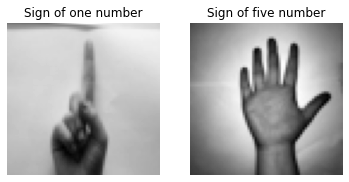

In [4]:

# Show image examples.
plt.subplot(1,2,1); plt.imshow(x_l[1027]); plt.axis('off'); 
plt.gray(); plt.title('Sign of one number');
plt.subplot(1,2,2); plt.imshow(x_l[1855]); plt.axis('off'); 
plt.gray(); plt.title('Sign of five number');

In [5]:
# Select one and five digit images and assign them corresponding labels.
X = np.concatenate((x_l[822:1027], x_l[1855:2060]), axis=0) # From 822 to 1027 is 'one' sign and from 1855 to 2060 is 'five' sign. 204 images of every class.
Y = np.concatenate((np.zeros(205), np.ones(205)), axis=0)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410,)


In [6]:
# Split X and Y into train and test sets: test = 30% and train = 70%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)  # random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
# Flatten every image into a 4096 vector
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test, X_test.shape[1]*X_test.shape[2])
print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (287, 4096)
X test flatten (123, 4096)


In [7]:
# For convinience, traspose all dataset so that every column contain the data of an image.
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 287)
x test:  (4096, 123)
y train:  (287,)
y test:  (123,)


Cost after iteration 0: 17.662252
Cost after iteration 100: 1.169737
Cost after iteration 200: 0.847805
Cost after iteration 300: 0.657949
Cost after iteration 400: 0.537854
Cost after iteration 500: 0.457369
Cost after iteration 600: 0.400436
Cost after iteration 700: 0.357757
Cost after iteration 800: 0.324171
Cost after iteration 900: 0.296799
Cost after iteration 1000: 0.273899
Cost after iteration 1100: 0.254326
Cost after iteration 1200: 0.237297
Cost after iteration 1300: 0.222256
Cost after iteration 1400: 0.208800
Cost after iteration 1500: 0.196629
Cost after iteration 1600: 0.185515
Cost after iteration 1700: 0.175283
Cost after iteration 1800: 0.165799
Cost after iteration 1900: 0.156961


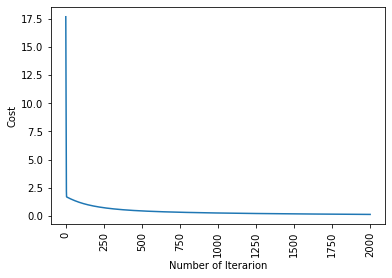

In [9]:
# Model initialization: weights and bias
def initialize_weights_and_bias(dimension):
    w = np.random.normal(loc=0.0, scale=1.0, size=(dimension, 1))  # Gaussian random initialization 
    b = 0.0
    return w,b
dimension =  x_train.shape[0]  
w,b = initialize_weights_and_bias(dimension)    
# Define elements involved in logistic regression
# Hipothesis model
def hipothesis_model(w,b,x_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_pred = 1/(1 + np.exp(-z))
    return y_pred
    
# Cost function or loss function
def cost_function(y_pred,y_train):
    eps = np.finfo(float).eps
    loss = (-y_train * np.log(y_pred + eps)) - ((1 - y_train) * np.log(1 - y_pred + eps))  # For every image sample.
    cost = np.sum(loss) / x_train.shape[1]  
    return cost
# Cost function gradients 
def cost_function_gradients(y_pred,y_train):
    derivative_weight = (np.dot(x_train, ((y_pred - y_train).T))) / x_train.shape[1] 
    derivative_bias = np.sum(y_pred - y_train) / x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return gradients
def training(w, b, x_train, y_train, number_of_iterarion, learning_rate, verbose = True):
    cost_list = []

    # Gradient Descent
    for i in range(number_of_iterarion):
        # Compute prediction with current hipothesis model
        y_pred = hipothesis_model(w, b, x_train)
        cost = cost_function(y_pred, y_train)
        gradients = cost_function_gradients(y_pred,y_train)

        # Save data for representation
        cost_list.append(cost)

        # Model update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

        # Verbose
        if (verbose and i % 100 == 0):
            print ("Cost after iteration %i: %f" %(i, cost))
        
    return w, b, cost_list

number_of_iterarion = 2000 #  Number of itertions in gradient descent
learning_rate = 0.01  # Learning rate
w, b, cost_list = training(w, b, x_train, y_train, number_of_iterarion, learning_rate, verbose = True)

# Plot learning curve: cost value along iterations
plt.plot(cost_list); plt.xticks(rotation='vertical'); plt.xlabel("Number of Iterarion"); plt.ylabel("Cost"); plt.show()

In [10]:
def predict(w, b, x_test):
    z = np.dot(w.T, x_test) + b
    y_pred = 1 / (1 + np.exp(-z))
    y_pred_th = np.zeros((1, x_test.shape[1]))
    
    for i in range(y_pred.shape[1]):
        if z[0,i]<= 0.5:  # if z is smaller than 0.5, our prediction is zero
            y_pred_th[0,i] = 0
        else:  # if z is bigger than 0.5, our prediction is one 
            y_pred_th[0,i] = 1
    return y_pred_th   

y_prediction_test = predict(w, b, x_test)
y_prediction_train = predict(w, b, x_train)

# Print train/test accuracy
print("Train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Train accuracy: 96.86411149825784 %
Test accuracy: 91.869918699187 %


In [11]:
from sklearn import linear_model
# Initialize logistic regression model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = number_of_iterarion)
# Train model
model = logreg.fit(x_train.T, y_train.T)
# Results
y_prediction_test = model.score(x_test.T, y_test.T)
y_prediction_train = model.score(x_train.T, y_train.T)
print("test accuracy: {} %".format(y_prediction_test * 100))
print("train accuracy: {} %".format(y_prediction_train * 100))

test accuracy: 99.1869918699187 %
train accuracy: 100.0 %
